In [1]:
#Importing modules

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

#Loading data
df_btc = pd.read_csv('btc_data.CSV')
df_eth = pd.read_csv('eth_data.CSV')


<ipython-input-35-d7258b12f781>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['time']= pd.to_datetime(df['time'],format='%Y-%m-%d')


<AxesSubplot:xlabel='time'>

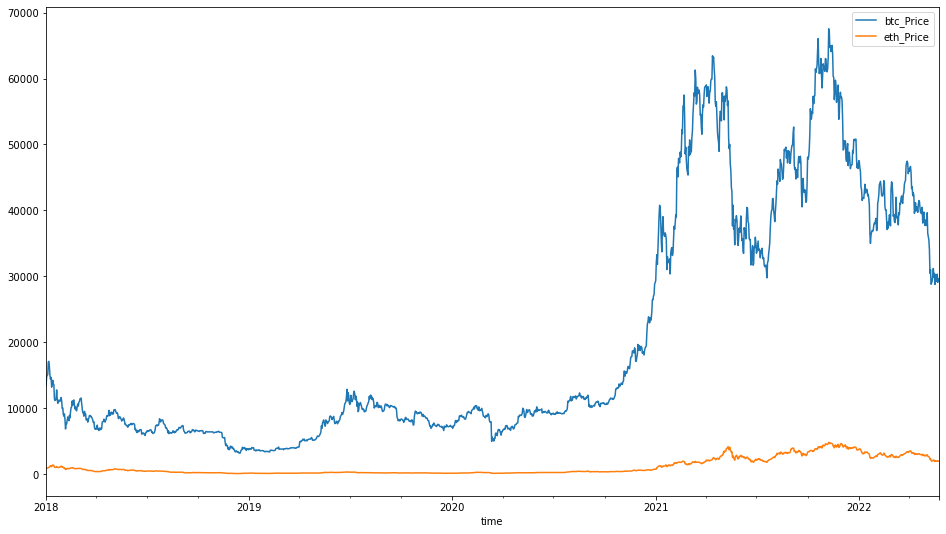

In [35]:
#Selecting data
#Removing rows accordinto index -> time set: 1-1-2018 / 25-05-2022 
df_btc_drop = df_btc.drop(range(0, 3285), inplace=False)
df_eth_drop = df_eth.drop(range(0, 886), inplace=False)

#Getting values
#Bitcoin
btc_time = df_btc_drop['time'] 
btc_price = df_btc_drop['PriceUSD']
btc_raw = pd.concat([btc_time,btc_price],axis =1)
btc_raw.rename(columns={'PriceUSD': 'btc_Price'},inplace=True)
btc_raw = btc_raw.reset_index()
btc_raw.drop(['index'], axis=1, inplace = True)

#Ethereum
eth_price = df_eth_drop['PriceUSD']
eth_raw = pd.concat([eth_price],axis =1)
eth_raw = eth_raw.reset_index()
eth_raw.drop(['index'], axis=1, inplace = True)
eth_raw.rename(columns={'PriceUSD': 'eth_Price'},inplace=True)

data_raw = pd.concat([btc_raw,eth_raw],axis =1)

df = data_raw.dropna()


#dataTime column to datatime series
df['time']= pd.to_datetime(df['time'],format='%Y-%m-%d')
df.index = df['time']
df = df.drop(df.columns[[0]], axis=1)

#Data visualization vs data time
df.plot(figsize=(16, 9))




In [36]:
#Mean in the last five years
df.mean()

btc_Price    20286.757810
eth_Price     1109.712099
dtype: float64

<AxesSubplot:ylabel='Frequency'>

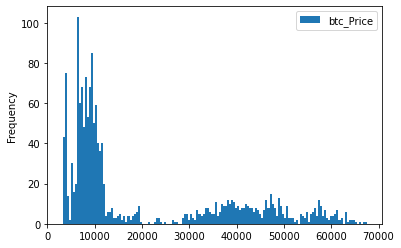

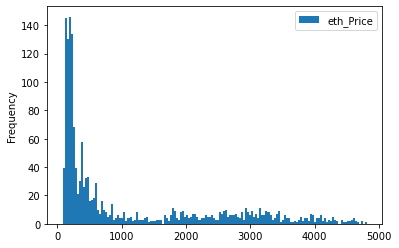

In [40]:
#Histrograms plots
df.plot(kind='hist', y='btc_Price', bins=150)
df.plot(kind='hist', y='eth_Price', bins=150)

C:\Users\tronc\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='btc_Price', ylabel='Density'>

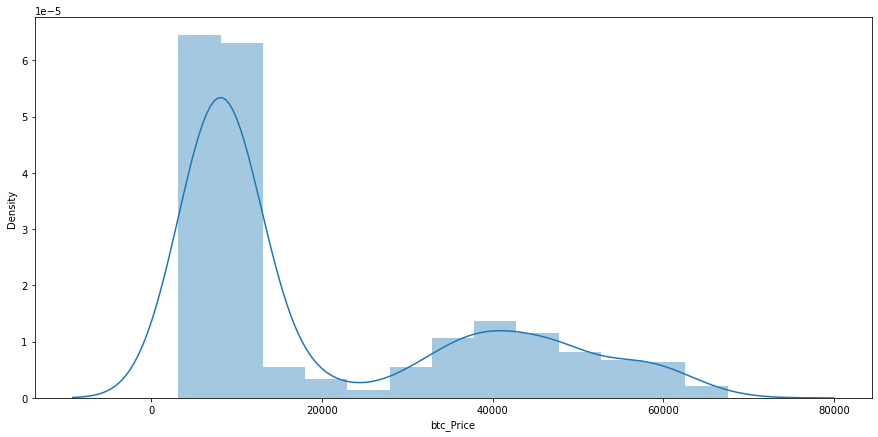

In [42]:
#Histograms using seaborns
fig, ax = plt.subplots(figsize=(15, 7))
sns.distplot(df['btc_Price'], ax=ax)

C:\Users\tronc\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='eth_Price', ylabel='Density'>

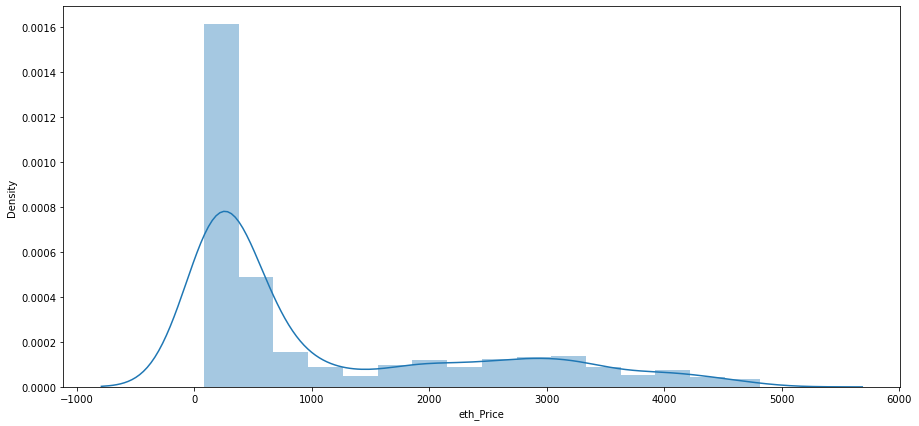

In [43]:
fig, ax = plt.subplots(figsize=(15, 7))
sns.distplot(df['eth_Price'], ax=ax)

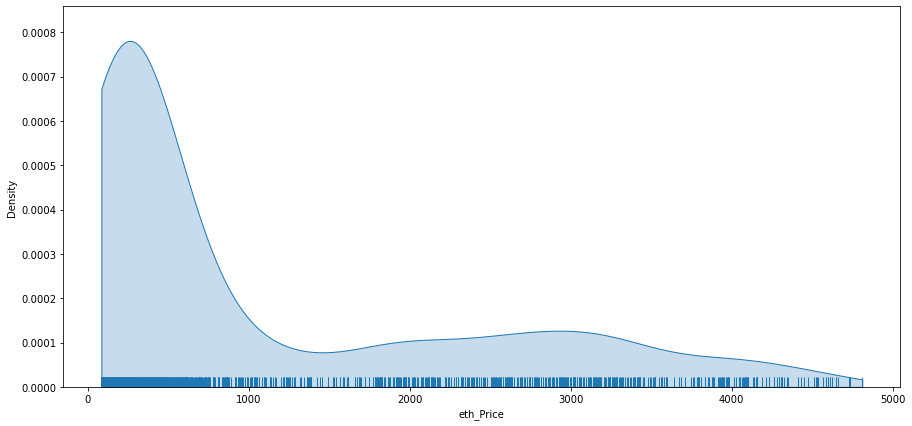

In [45]:
#Seaborn's distplot is a general method that will plot a histogram, a KDE and a rugplot. You can also use them as separate
fig, ax = plt.subplots(figsize=(15, 7))
sns.kdeplot(df['eth_Price'], shade=True, cut=0, ax=ax)
sns.rugplot(df['eth_Price'], ax=ax);

C:\Users\tronc\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='btc_Price', ylabel='Density'>

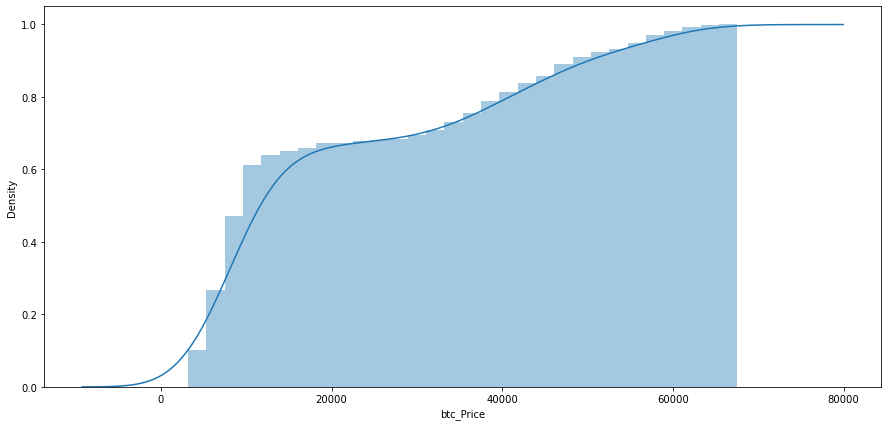

In [48]:
#We can also visualize a cumulative plot of our distribution: 
#This plot shows how many samples fall behind a certain value. We can increase the number of bins in order to have more detail:

fig, ax = plt.subplots(figsize=(15, 7))
sns.distplot(df['btc_Price'], ax=ax, bins = 30,
             hist_kws=dict(cumulative=True),
             kde_kws=dict(cumulative=True))

C:\Users\tronc\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='eth_Price', ylabel='Density'>

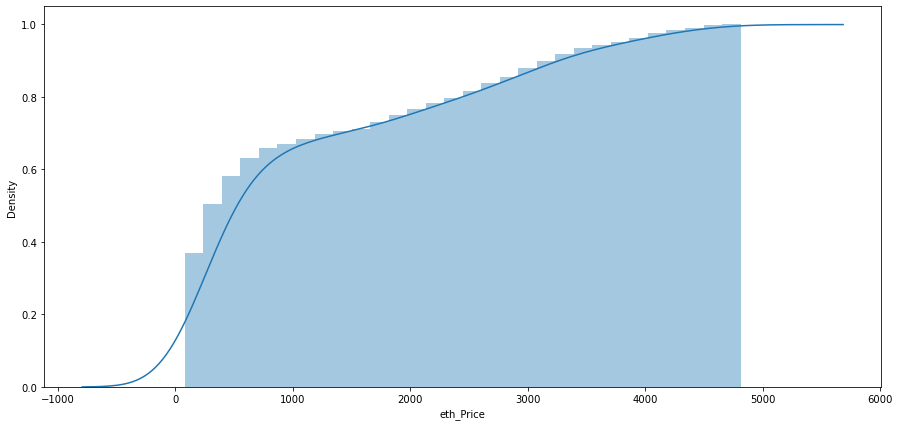

In [49]:
fig, ax = plt.subplots(figsize=(15, 7))
sns.distplot(df['eth_Price'], ax=ax, bins = 30,
             hist_kws=dict(cumulative=True),
             kde_kws=dict(cumulative=True))

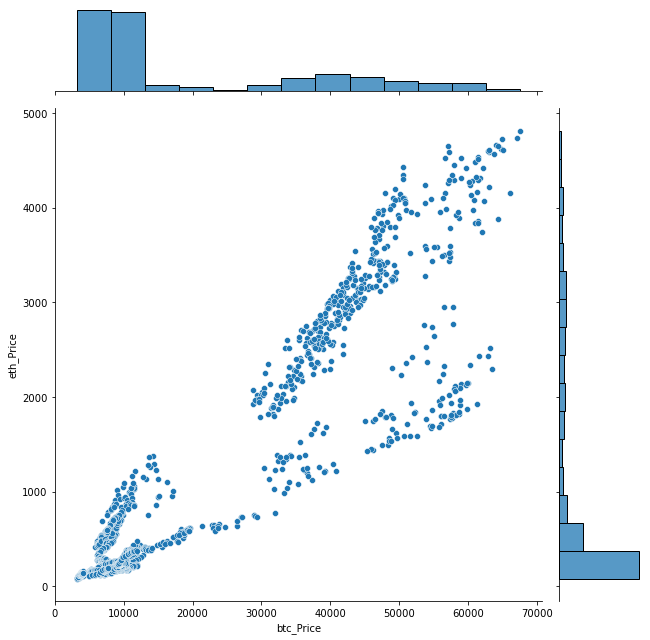

In [52]:
#Visualizing bivariate distributions (include the distribution of the variables)
sns.jointplot(x="btc_Price", y="eth_Price", data=df, size=9)

<AxesSubplot:xlabel='btc_Price', ylabel='eth_Price'>

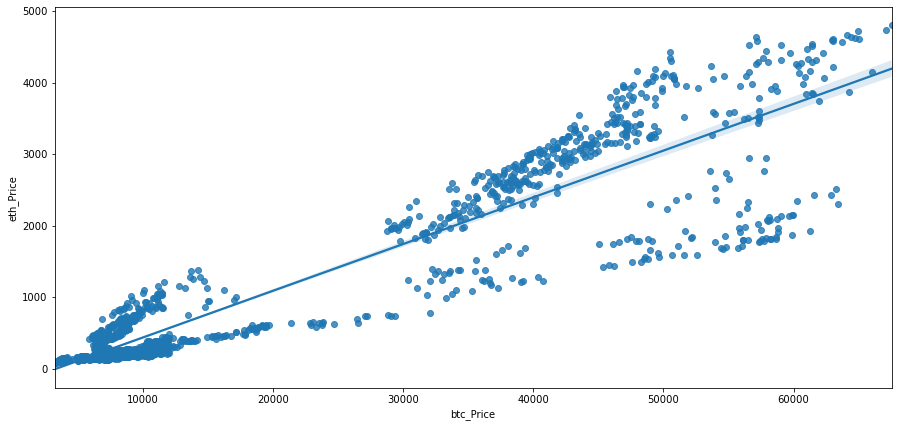

In [54]:
#Regplot -> scatter plot + linear regression model in the plot
fig, ax = plt.subplots(figsize=(15, 7))
sns.regplot(x="btc_Price", y="eth_Price", data=df, ax=ax)

C:\Users\tronc\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


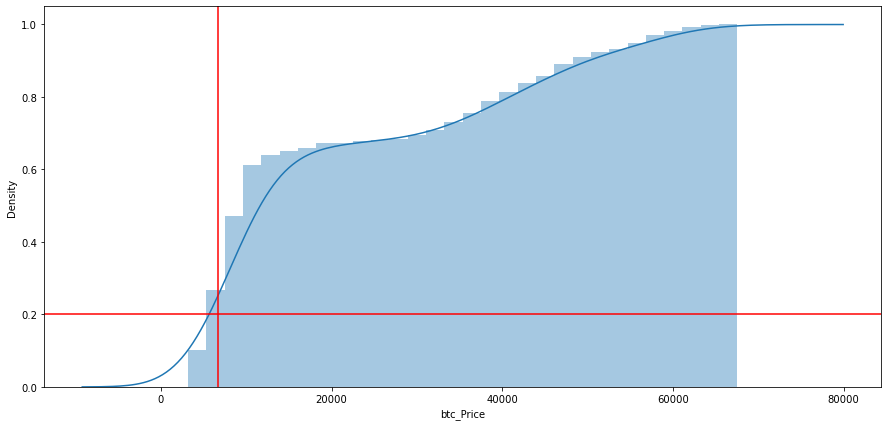

In [61]:
# Quantiles, quartiles and percentiles

df['btc_Price'].quantile(.2)
fig, ax = plt.subplots(figsize=(15, 7))
sns.distplot(df['btc_Price'], ax=ax, bins=30,
             hist_kws=dict(cumulative=True),
             kde_kws=dict(cumulative=True))
ax.axhline(0.2, color='red')
ax.axvline(df['btc_Price'].quantile(.2), color='red')


C:\Users\tronc\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


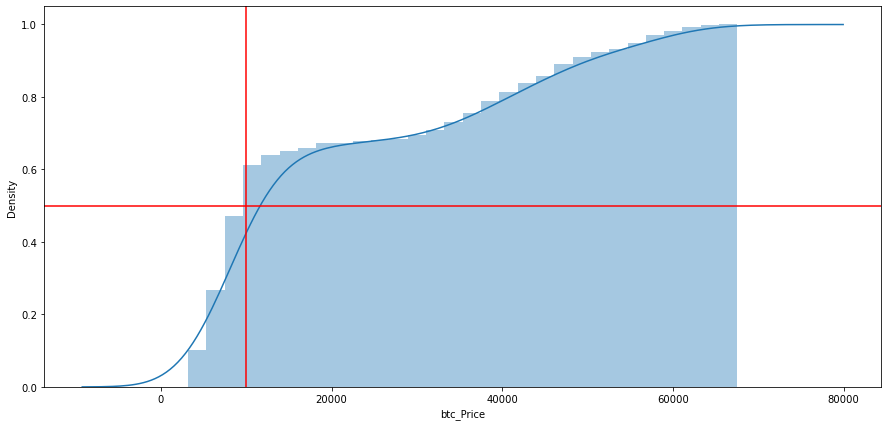

In [62]:
df['btc_Price'].quantile(.5)
fig, ax = plt.subplots(figsize=(15, 7))
sns.distplot(df['btc_Price'], ax=ax, bins=30,
             hist_kws=dict(cumulative=True),
             kde_kws=dict(cumulative=True))
ax.axhline(0.5, color='red')
ax.axvline(df['btc_Price'].quantile(.5), color='red')

C:\Users\tronc\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


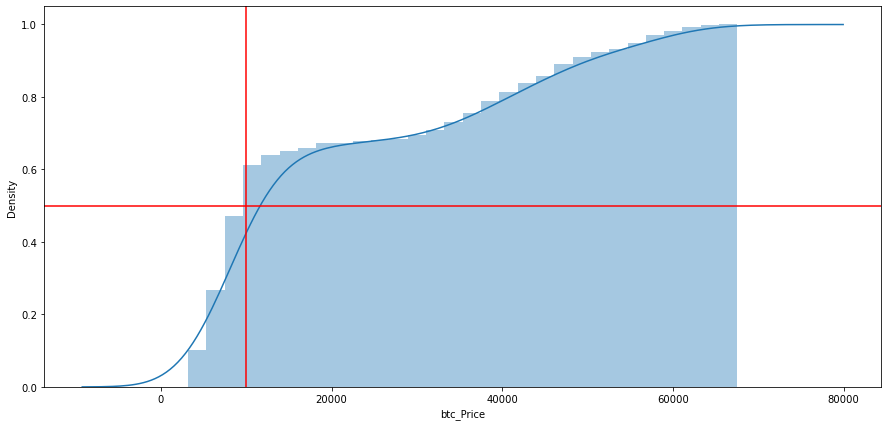

In [64]:
df['btc_Price'].median()
fig, ax = plt.subplots(figsize=(15, 7))
sns.distplot(df['btc_Price'], ax=ax, bins=30,
             hist_kws=dict(cumulative=True),
             kde_kws=dict(cumulative=True))
ax.axhline(0.5, color='red')
ax.axvline(df['btc_Price'].median(), color='red')


In [73]:
#IQR: Interquartile range is a good measure of "centered" dispersion, Q3 - Q1 (3rd quartile - 1st quartile)
#IQR is more robust than std or range, because it's not so sensitive to outliers.

df['btc_Price'].quantile(.75) - df['btc_Price'].quantile(.25)

29805.351054631763

In [71]:
df['eth_Price'].quantile(.75) - df['eth_Price'].quantile(.25)

1775.385190239629

In [90]:
#Analytical Analysis of invalid values
#define what values are above or below the mean (or the max/min value)


upper_limit = df['btc_Price'].mean() + 2 * df['btc_Price'].std()
lower_limit = df['btc_Price'].mean() - 2 * df['btc_Price'].std()
print("Upper Limit: {}".format(upper_limit))
print("Lower Limit: {}".format(lower_limit))

Upper Limit: 56444.253051629115
Lower Limit: -15870.737432113936


C:\Users\tronc\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


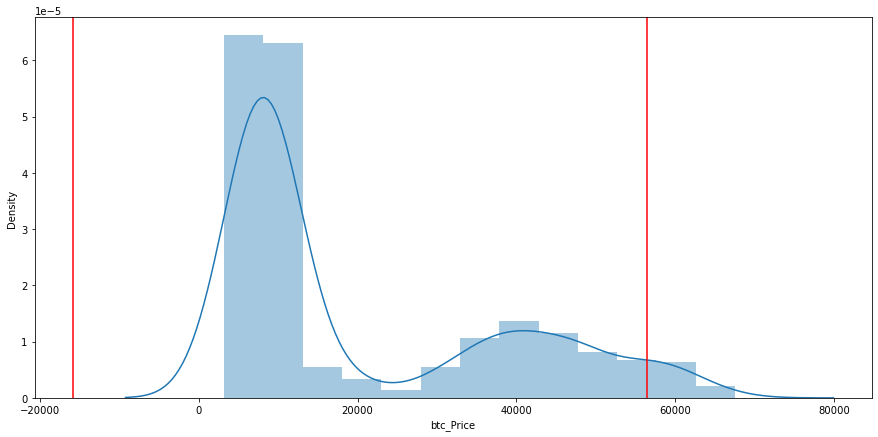

In [91]:
fig, ax = plt.subplots(figsize=(15, 7))
sns.distplot(df['btc_Price'], ax=ax)
ax.axvline(lower_limit, color='red')
ax.axvline(upper_limit, color='red')

Upper Limit: 3656.679665102817
Lower Limit: -1437.2554679545565


C:\Users\tronc\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


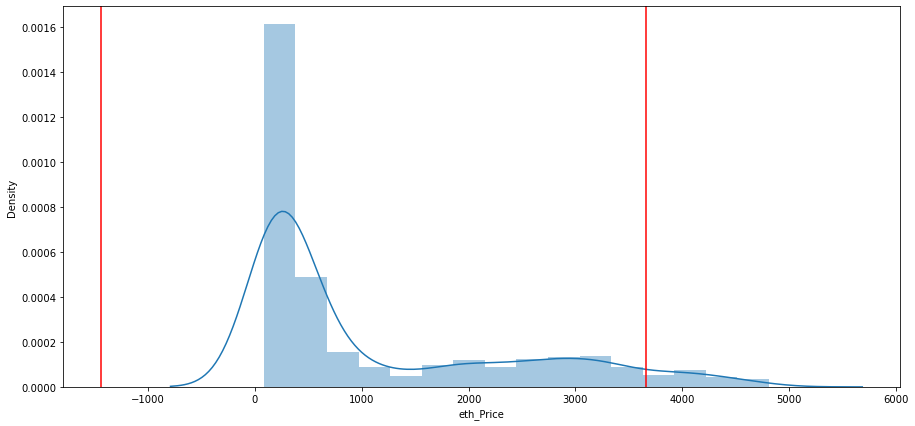

In [89]:
#Our lower limit doesn't make a lot of sense, as negative values are invalid. 
#But our upper limit has a really good measure. Pretty accurate.

upper_limit = df['eth_Price'].mean() + 2 * df['eth_Price'].std()
lower_limit = df['eth_Price'].mean() - 2 * df['eth_Price'].std()
print("Upper Limit: {}".format(upper_limit))
print("Lower Limit: {}".format(lower_limit))

fig, ax = plt.subplots(figsize=(15, 7))
sns.distplot(df['eth_Price'], ax=ax)
ax.axvline(lower_limit, color='red')
ax.axvline(upper_limit, color='red')

In [92]:
df.corr()

,btc_Price,eth_Price
btc_Price,1.000000,0.927038
eth_Price,0.927038,1.000000
